In [26]:
import time
t0 = time.time()

In [27]:
%matplotlib inline
from pylab import *
import cv2

In [28]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
rcParams['figure.figsize'] = 10, 10

In [30]:
from dataset import load_image

In [31]:
import torch

In [32]:
%pip install albumentations

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import albumentations

In [34]:
from utils import cuda

In [35]:
from generate_masks import get_model

In [36]:
from albumentations import Compose, Normalize

In [37]:
from torchvision.transforms import ToTensor

In [38]:
def img_transform(p=1):
    return Compose([
        Normalize(p=1)
    ], p=p)


In [39]:
def mask_overlay(image, mask, color=(0, 255, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0    
    img[ind] = weighted_sum[ind]    
    return img

In [40]:
t2 = time.time()

In [41]:
model_path = 'data/models/unet11_binary_20/model_0.pt'
model = get_model(model_path, model_type='UNet11', problem_type='binary')

c:\Users\queen\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\queen\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [42]:
img_file_name = 'data/cropped_train/instrument_dataset_1/images/frame003.jpg'
gt_file_name = 'data/cropped_train/instrument_dataset_1/binary_masks/frame003.png'

In [43]:
image = load_image(img_file_name)
gt = cv2.imread(gt_file_name, 0) > 0

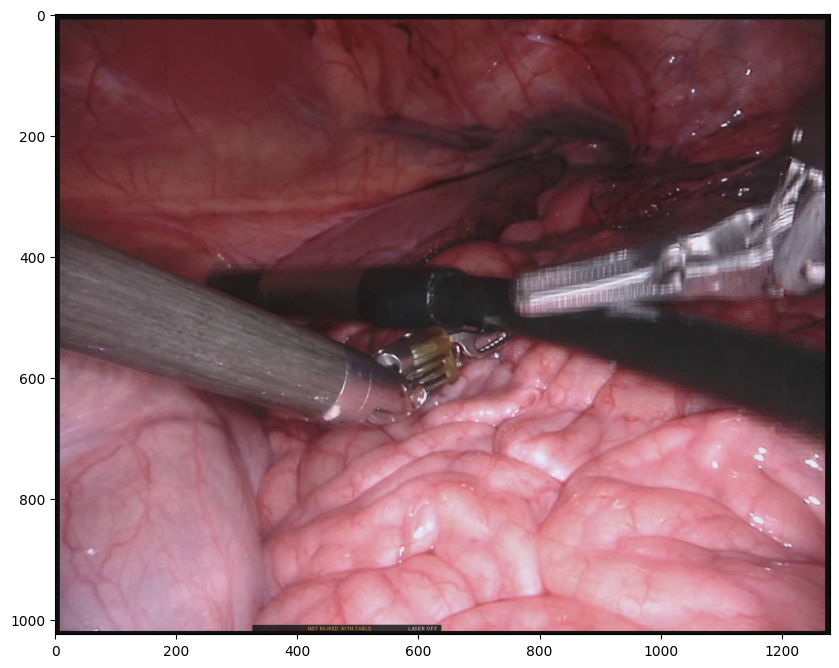

In [44]:
imshow(image)

In [45]:
with torch.no_grad():
    transformed_image = img_transform(p=1)(image=image)['image']
    input_image = torch.unsqueeze(ToTensor()(transformed_image), dim=0)

In [46]:
mask = model(input_image)

In [47]:
mask_array = mask.data[0].cpu().numpy()[0]

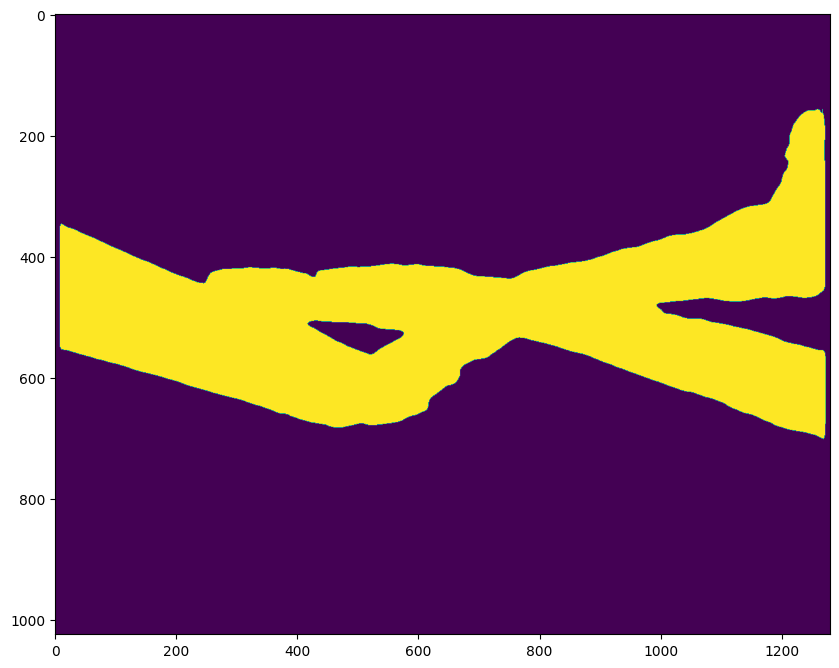

In [48]:
imshow(mask_array > 0)

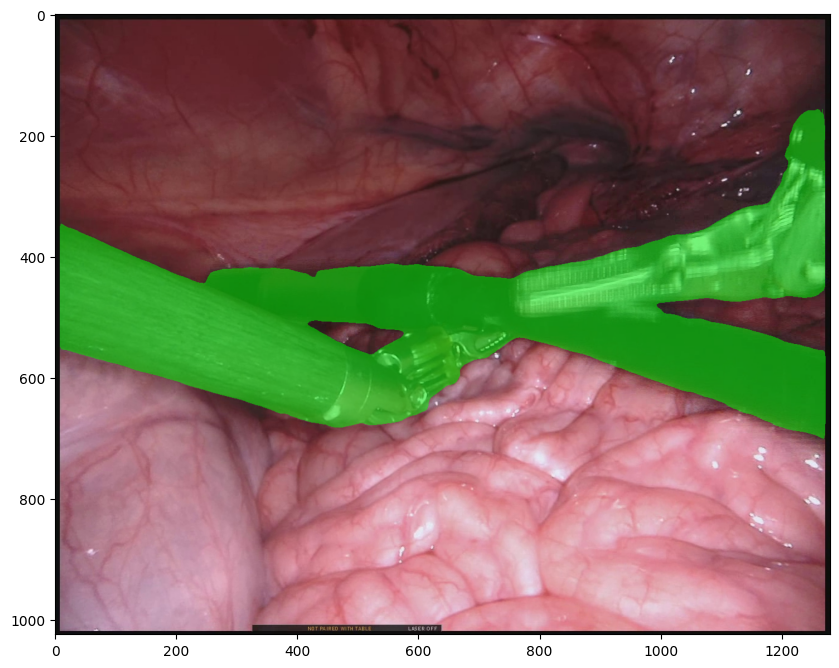

In [49]:
imshow(mask_overlay(image, (mask_array > 0).astype(np.uint8)))

In [50]:
t1 = time.time()

print(t1-t0)
print(t1-t2)

114.4243266582489
76.67554473876953
